# Data Analysis of International Master Programs in Germany 2024

![Friedrich-Alexander-Universität Erlangen-Nürnberg](https://www.fau.de/files/2019/07/Kollegienhaus_Malter_3-1024x607.jpg)

* This notebook presents the data analysis of international master programs offered in Germany in 2024. 
* Through analyses and visualizations of the dataset, important characteristics such as program types, languages, starting semesters, durations, and tuition fees are examined. 
* Additionally, geographical visualizations display the locations of universities and program distributions.


# 1. Import Libraries and Data

In [75]:
# Basic libraries for data processing and analysis
import pandas as pd  # Pandas for data manipulation
import numpy as np   # Numpy for numerical operations

# Libraries for visualization
import matplotlib.pyplot as plt  # Matplotlib for basic plotting
import seaborn as sns            # Seaborn for enhanced visualizations
import folium                    # Folium for interactive maps

# Library for visualizing missing values
import missingno as msno

# Libraries for geographical visualizations
from folium.plugins import MarkerCluster       # Marker clustering in Folium
from folium.plugins import FastMarkerCluster   # Faster marker clustering
from geopy.geocoders import Nominatim         # Geocoding library for Folium

In [ ]:
df = pd.read_csv("./archive/daad_international_master_programs.csv")
df.head()

,Degree Type,Course Title,Institution Name,City Name,Subject,Language,Beginning Semester,Duration,Tuition Fee,Detail Link
0,Master's degree,Actuarial and Financial Mathematics,RPTU University of Kaiserslautern-Landau,Kaiserslautern,Mathematics,English,"Winter semester, Summer semester",4 semesters,none,https://www2.daad.de/deutschland/studienangebo...
1,Master's degree,Advanced and Computational Mathematics – Inter...,Chemnitz University of Technology,Chemnitz,Mathematics,English,"Winter semester, Summer semester",4 semesters,none,https://www2.daad.de/deutschland/studienangebo...
2,Master's degree,Advanced Architecture — From Urban Design to B...,Frankfurt University of Applied Sciences,Frankfurt am Main,Architecture,English,Summer semester,4 semesters,none,https://www2.daad.de/deutschland/studienangebo...
3,Master's degree,Advanced Computational Methods in Civil Engine...,RWTH Aachen University,Aachen,Civil Engineering,English,"Winter semester, Summer semester",4 semesters,none,https://www2.daad.de/deutschland/studienangebo...
4,Master's degree,Advanced Functional Materials,Chemnitz University of Technology,Chemnitz,Chemistry,English,Winter semester,4 semesters,none,https://www2.daad.de/deutschland/studienangebo...


# 2. Data Set Introduction and Preprocessing

## General description of the dataset

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Degree Type         1514 non-null   object
 1   Course Title        1514 non-null   object
 2   Institution Name    1514 non-null   object
 3   City Name           1514 non-null   object
 4   Subject             1514 non-null   object
 5   Language            1514 non-null   object
 6   Beginning Semester  1514 non-null   object
 7   Duration            1514 non-null   object
 8   Tuition Fee         1428 non-null   object
 9   Detail Link         1514 non-null   object
dtypes: object(10)
memory usage: 118.4+ KB


## Checking for missing values

In [78]:
df.isnull().sum()

Degree Type            0
Course Title           0
Institution Name       0
City Name              0
Subject                0
Language               0
Beginning Semester     0
Duration               0
Tuition Fee           86
Detail Link            0
dtype: int64

In [79]:
# Handling missing values: Based on the approach
df.fillna('none')

# Define a function to handle "none" and "varied" values appropriately
def convert_tuition_fee(value):
    if isinstance(value, str):
        if value == 'none' or value == 'varied':
            return np.nan   # Return NaN if the value is "none" or "varied"
        else:
            # Clean and convert the numerical value by removing the EUR sign and commas
            value = value.replace('EUR', '').replace(',', '').strip()
            return float(value)  # Convert the cleaned value to float
    else:
        return value

# Apply the transformation
df['Tuition Fee'] = df['Tuition Fee'].apply(convert_tuition_fee)

df.tail()

,Degree Type,Course Title,Institution Name,City Name,Subject,Language,Beginning Semester,Duration,Tuition Fee,Detail Link
1509,Master's degree,Web Science (Master of Science),Technische Hochschule Köln (University of Appl...,Köln,Computer Science,English,"Winter semester, Summer semester",5 semesters,1400.0,https://www2.daad.de/deutschland/studienangebo...
1510,Master's degree,Wood Science,Universität Hamburg,Hamburg,"Forestry, Wood Economics",English,Winter semester,4 semesters,NaN,https://www2.daad.de/deutschland/studienangebo...
1511,Master's degree,World Heritage Studies (WHS On-Campus),Brandenburg University of Technology Cottbus-S...,Cottbus,Languages and Cultural Studies in general,English,Winter semester,4 semesters,NaN,https://www2.daad.de/deutschland/studienangebo...
1512,Master's degree,World Heritage Studies Online (WHS Online),Brandenburg University of Technology Cottbus-S...,Cottbus,Languages and Cultural Studies in general,English,Winter semester,4 semesters,NaN,https://www2.daad.de/deutschland/studienangebo...
1513,Master's degree,"World Studies: Orders, Politics, Cultures",Bielefeld University,Bielefeld,Social Science,English,Winter semester,4 semesters,NaN,https://www2.daad.de/deutschland/studienangebo...


## Checking data types

In [80]:
df.dtypes

Degree Type            object
Course Title           object
Institution Name       object
City Name              object
Subject                object
Language               object
Beginning Semester     object
Duration               object
Tuition Fee           float64
Detail Link            object
dtype: object

# 3. Basic Statistics and General Information

## Distribution of program types

In [81]:
df['Degree Type'].value_counts()

Degree Type
Master's degree    1514
Name: count, dtype: int64

## Distribution of language options

In [82]:
df['Language'].value_counts()

Language
English                             1328
German, English                       99
English, German                       28
German                                24
German, French                        13
English, French                        6
English, Spanish                       5
English, Chinese                       4
English, Other teaching language       3
German, Spanish                        3
German, Italian                        1
Name: count, dtype: int64

## Distribution of starting semesters

In [83]:
df['Beginning Semester'].value_counts()

Beginning Semester
Winter semester                     907
Winter semester, Summer semester    554
Summer semester                      41
Other                                 9
Trimester and quarter                 3
Name: count, dtype: int64

## Statistics of program durations

In [84]:
print(df['Duration'].describe())
print('---')
df['Duration'].value_counts()

count            1514
unique             19
top       4 semesters
freq             1147
Name: Duration, dtype: object
---


Duration
4 semesters                              1147
3 semesters                               215
2 semesters                                49
3 semesters, 4 semesters                   31
2 semesters, 4 semesters                   13
2 semesters, 3 semesters, 4 semesters       9
6 semesters                                 8
5 semesters                                 8
3 semesters, 6 semesters                    6
4 semesters, 8 semesters                    6
2 semesters, 3 semesters                    5
3 semesters, 5 semesters                    5
4 semesters, 6 semesters                    4
7 semesters                                 2
9 semesters or more                         2
4 semesters, 5 semesters                    1
4 semesters, 7 semesters                    1
2 semesters, 8 semesters                    1
5 semesters, 7 semesters                    1
Name: count, dtype: int64

## Statistics of tuition fees

In [85]:
df['Tuition Fee'].describe()

count      285.000000
mean      4811.922807
std       3423.816620
min        500.000000
25%       2158.000000
50%       4400.000000
75%       6500.000000
max      21550.000000
Name: Tuition Fee, dtype: float64

# 4. Visual Data Analysis

## Distribution of program types: Bar chart

In [86]:
# Group by 'Degree Type' and filter for "Master's degree"
grouped_courses = df.groupby('Degree Type')['Course Title'].apply(list)

# Get the 'Course Title' for "Master's degree"
masters_courses = grouped_courses.get("Master's degree", [])

# Display the result
print("Courses for Master's degree:")
print(masters_courses)


Courses for Master's degree:
['Actuarial and Financial Mathematics', "Advanced and Computational Mathematics – International Master's Programme", 'Advanced Architecture — From Urban Design to Building Construction', 'Advanced Computational Methods in Civil Engineering', 'Advanced Functional Materials', 'Advanced Green Engineering and Sustainable Management', 'Advanced Industrial Engineering', 'Advanced Manufacturing', 'Advanced Materials Analysis', 'Advanced Quantum Physics (MSc)', 'Advanced Signal Processing and Communications Engineering MSc', 'Advanced Spectroscopy in Chemistry (ASC)', 'Advisory and Innovation Services in Agri-Food Systems (AdvisoryServices)', 'Aerospace (MSc)', 'African Languages and Cultures', 'African Verbal and Visual Arts: Languages, Literatures, Media and Art', 'Agricultural and Food Economics (AFECO)', 'Agricultural Biosciences', 'Agricultural Economics (AgEcon)', 'Agricultural Sciences and Resource Management in the Tropics and Subtropics (ARTS)', 'Agricultu

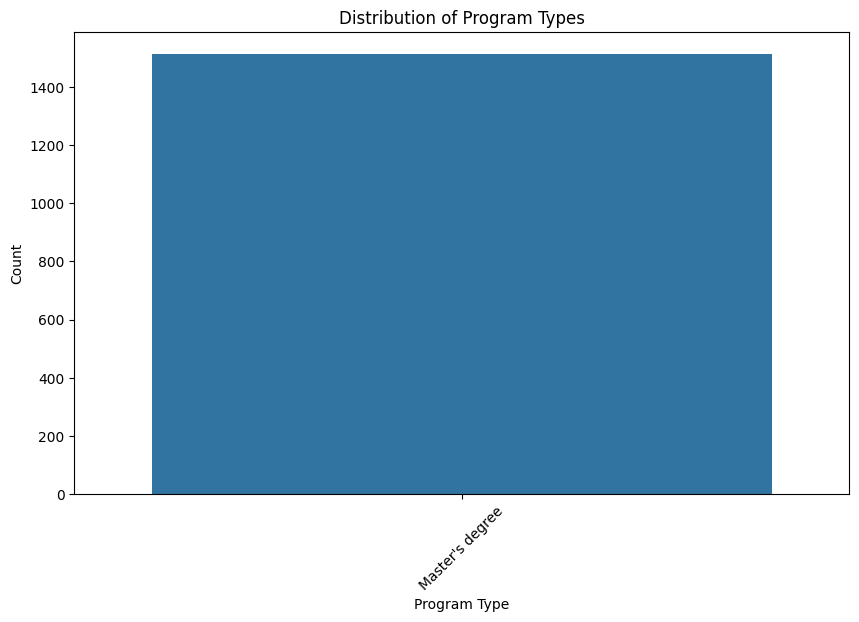

In [94]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Degree Type', data=df)
plt.title('Distribution of Program Types')
plt.xlabel('Program Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Distribution of language options: Pie chart

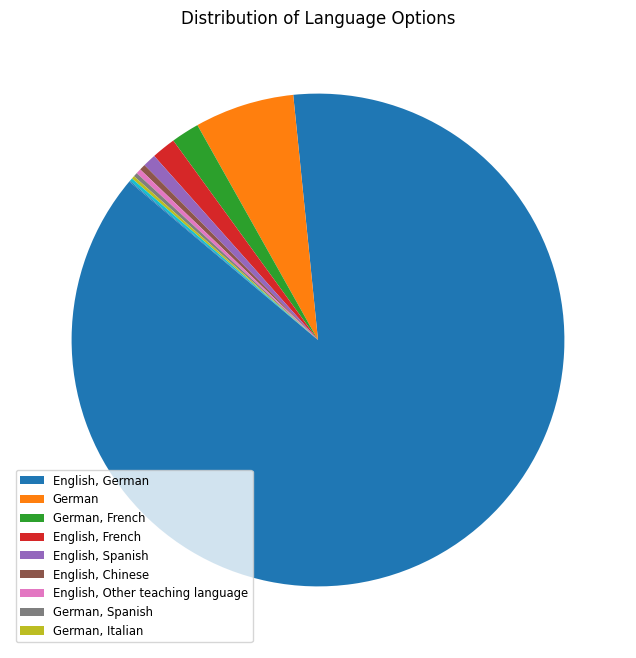

In [13]:
import matplotlib.pyplot as plt

# Distribution of language options: Pie chart with legend and labels outside
plt.figure(figsize=(10, 8))
language_counts = df['Language'].value_counts()
labels = language_counts.index
sizes = language_counts.values

# Plot the pie chart without labels
patches, _ = plt.pie(sizes, labels=None, startangle=140, pctdistance=0.85)

# Create legend for languages with small percentage
small_languages = labels[sizes < 0.05 * df.shape[0]]  # Select languages with less than 5% occurrence
plt.legend(labels=small_languages, loc="lower left", fontsize='small')

# Set labels outside
plt.title('Distribution of Language Options')
plt.show()

## Distribution of starting semesters: Pie chart

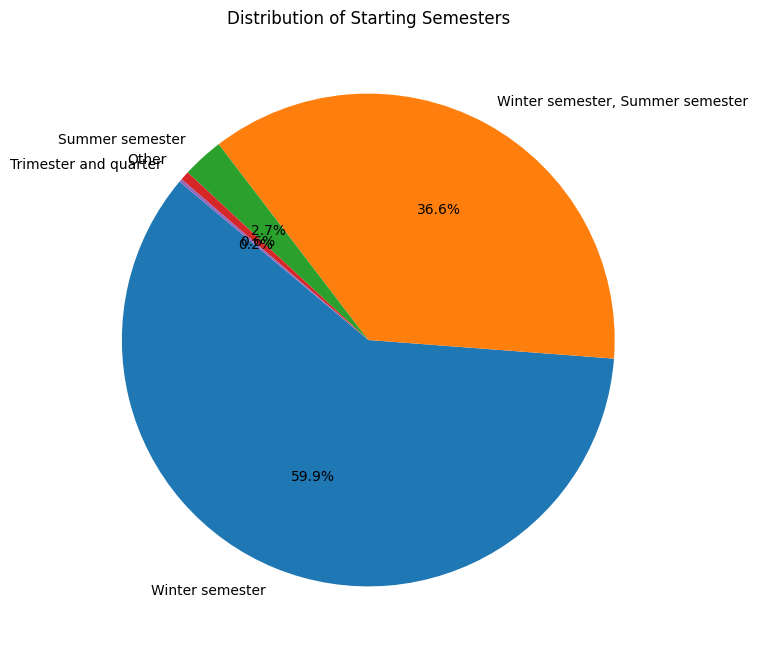

In [14]:
plt.figure(figsize=(8, 8))
df['Beginning Semester'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Starting Semesters')
plt.ylabel('')
plt.show()

## Distribution of program durations: Box plot

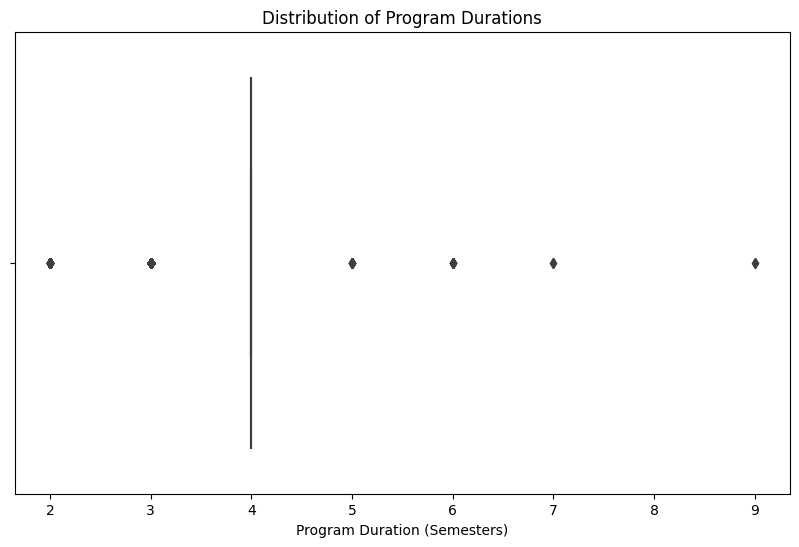

In [15]:
# Convert program durations to numerical
df['Duration_2'] = df['Duration'].str.extract('(\d+)').astype(float)

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Duration_2', data=df)
plt.title('Distribution of Program Durations')
plt.xlabel('Program Duration (Semesters)')
plt.show()

## Distribution of tuition fees: Box plot

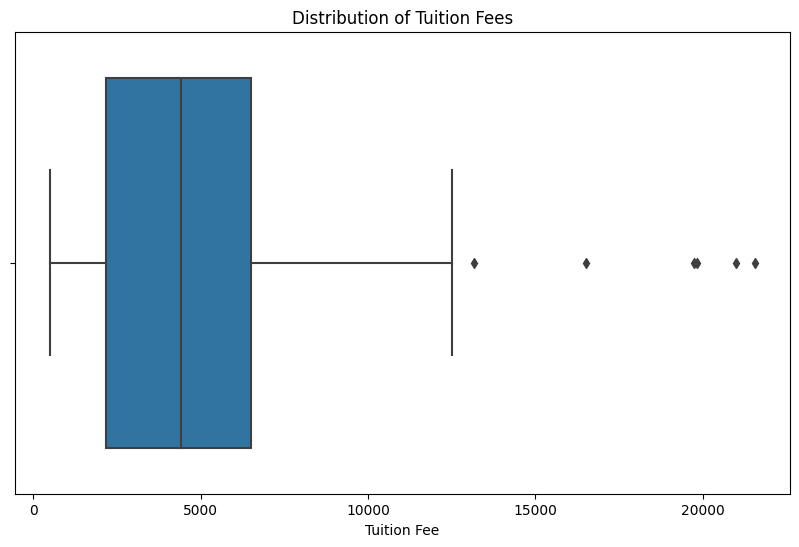

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tuition Fee', data=df)
plt.title('Distribution of Tuition Fees')
plt.xlabel('Tuition Fee')
plt.show()

# 5. Additional Analyses and Comparisons

## Comparison of the most expensive and cheapest programs (excluding 0)

In [17]:
most_expensive = df[df['Tuition Fee'] > 0]['Tuition Fee'].max()
cheapest = df[df['Tuition Fee'] > 0]['Tuition Fee'].min()
print("Comparison of the Most Expensive and Cheapest Programs:")
print("Most Expensive Program: €", most_expensive)
print("Cheapest Program: €", cheapest)

Comparison of the Most Expensive and Cheapest Programs:
Most Expensive Program: € 21550.0
Cheapest Program: € 500.0


## Comparison of the longest and shortest programs

In [18]:
longest = df['Duration_2'].max()
shortest = df['Duration_2'].min()
print("\nComparison of the Longest and Shortest Programs:")
print("Longest Program: ", longest, " semesters")
print("Shortest Program: ", shortest, " semesters")


Comparison of the Longest and Shortest Programs:
Longest Program:  9.0  semesters
Shortest Program:  2.0  semesters


## Comparison of program counts by city

In [19]:
city_counts = df['City Name'].value_counts()
print(city_counts)

City Name
Berlin                118
München                55
Köln                   49
Hamburg                49
Aachen                 41
                     ... 
Lemgo                   1
Bergholz-Rehbrücke      1
Lambaréné, Gabon        1
Burghausen              1
Geisenheim              1
Name: count, Length: 165, dtype: int64


## Examination of relationship between program types and languages

In [20]:
cross_tab = pd.crosstab(df['Degree Type'], df['Language'])
cross_tab

Language,English,"English, Chinese","English, French","English, German","English, Other teaching language","English, Spanish",German,"German, English","German, French","German, Italian","German, Spanish"
Degree Type,,,,,,,,,,,
Master's degree,1328,4,6,28,3,5,24,99,13,1,3


# 6. Advanced Analyses

## Examination of the relationship between program types and tuition fees

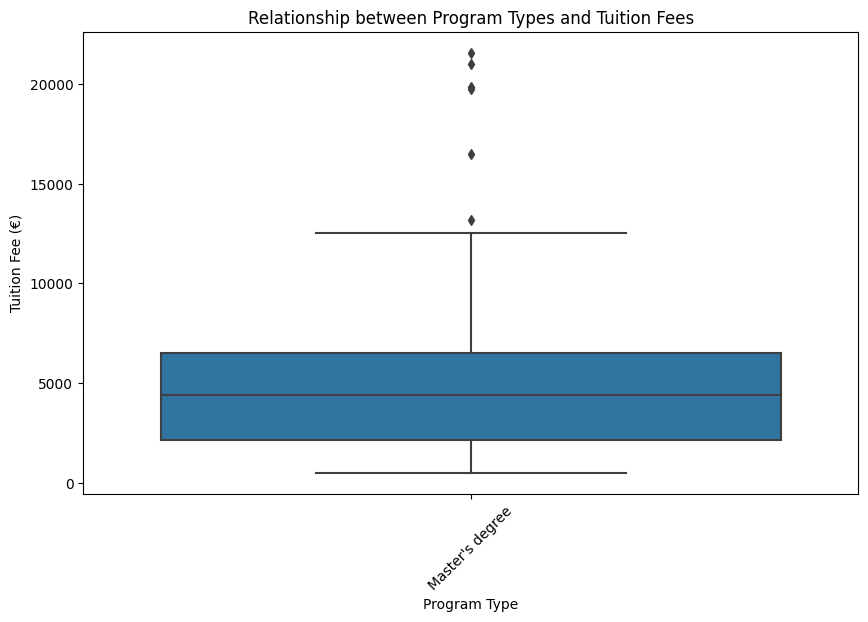

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Degree Type', y='Tuition Fee', data=df)
plt.title('Relationship between Program Types and Tuition Fees')
plt.xlabel('Program Type')
plt.ylabel('Tuition Fee (€)')
plt.xticks(rotation=45)
plt.show()

## Examination of the relationship between program durations and beginning semesters


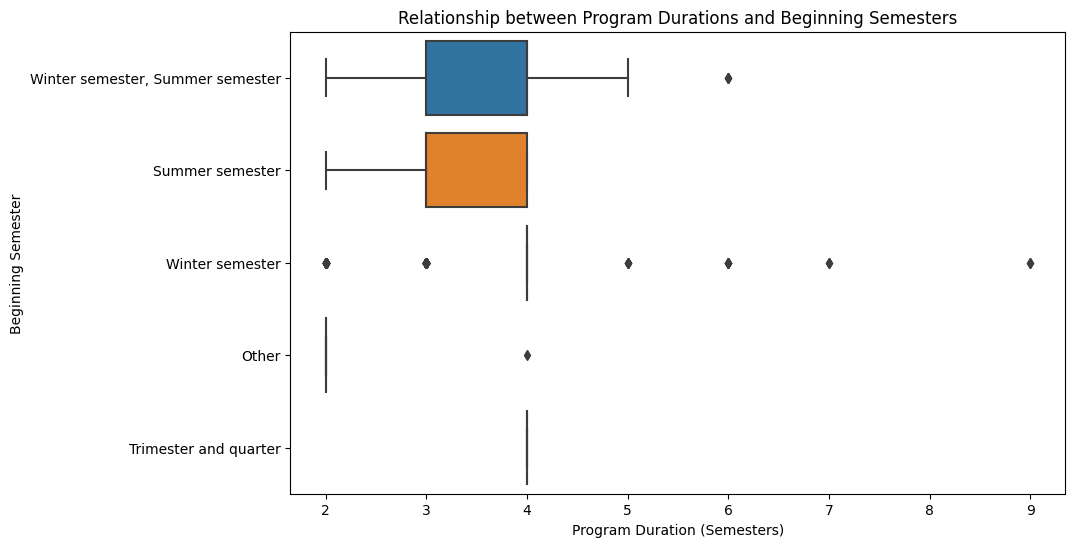

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Duration_2', y='Beginning Semester', data=df)
plt.title('Relationship between Program Durations and Beginning Semesters')
plt.xlabel('Program Duration (Semesters)')
plt.ylabel('Beginning Semester')
plt.show()

## Comparison of program diversity by subject

                                           Course Title  Count
0                          Master of Science in Physics      9
1                                          Data Science      8
2                        Master of Science in Economics      8
3                                             Economics      6
4                                               Physics      6
...                                                 ...    ...
1410                    Urban Design Master's Programme      1
1411                               Urban Transformation      1
1412                         Usability Engineering, MSc      1
1413                             User Experience Design      1
1414  Advanced Green Engineering and Sustainable Man...      1

[1415 rows x 2 columns]
                                         Course Title  Count
0                        Master of Science in Physics      9
1                                        Data Science      8
2                      Master of Sci

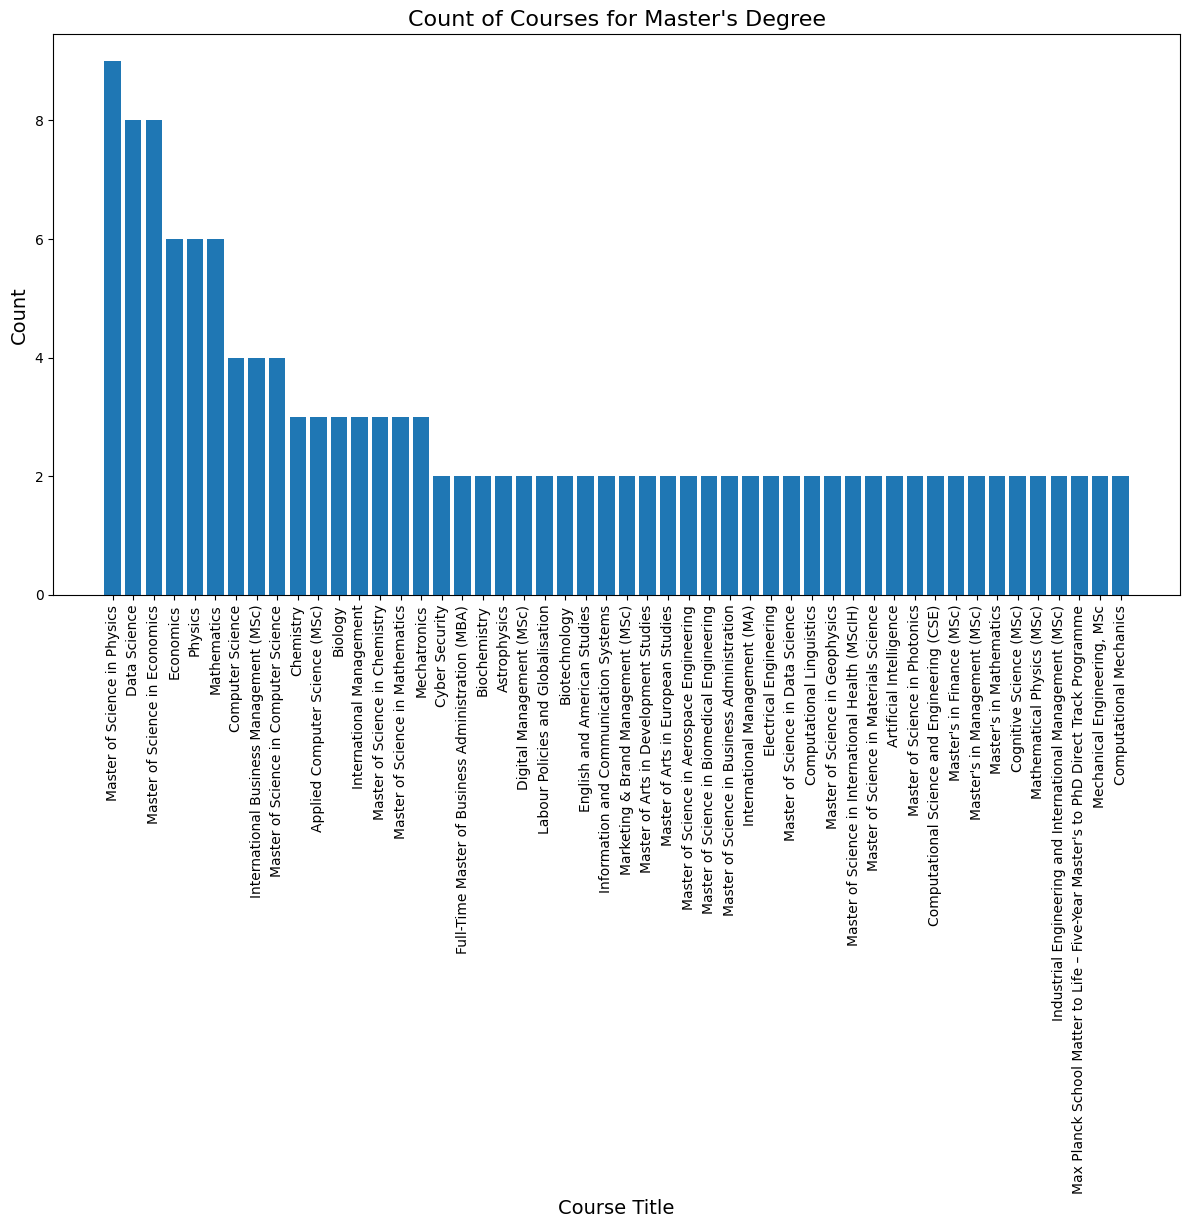

In [103]:
import pandas as pd

# Filter the DataFrame for "Master's degree"
masters_df = df[df['Degree Type'] == "Master's degree"]

# Count occurrences of each course
course_counts = masters_df['Course Title'].value_counts().reset_index()

# Rename the columns for clarity
course_counts.columns = ['Course Title', 'Count']

# Display the resulting DataFrame
print(course_counts)

# Get the top 15 courses (or fewer if there are not 15)
major_course_count = course_counts.head(50)

# Display the resulting DataFrame
major_course_count



# Sample DataFrame (replace this with your actual `course_counts` DataFrame)
data = major_course_count
print(data)

# Adjusting the bar chart to align text with bars
plt.figure(figsize=(12, 8))
plt.bar(data['Course Title'], data['Count'], width=0.8, align='center')

# Add titles and labels
plt.title("Count of Courses for Master's Degree", fontsize=16)
plt.xlabel("Course Title", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels and align with bars

# Increase the space between bars for better readability
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Adjust the bottom margin to prevent label overlap

# Show the plot
plt.show()



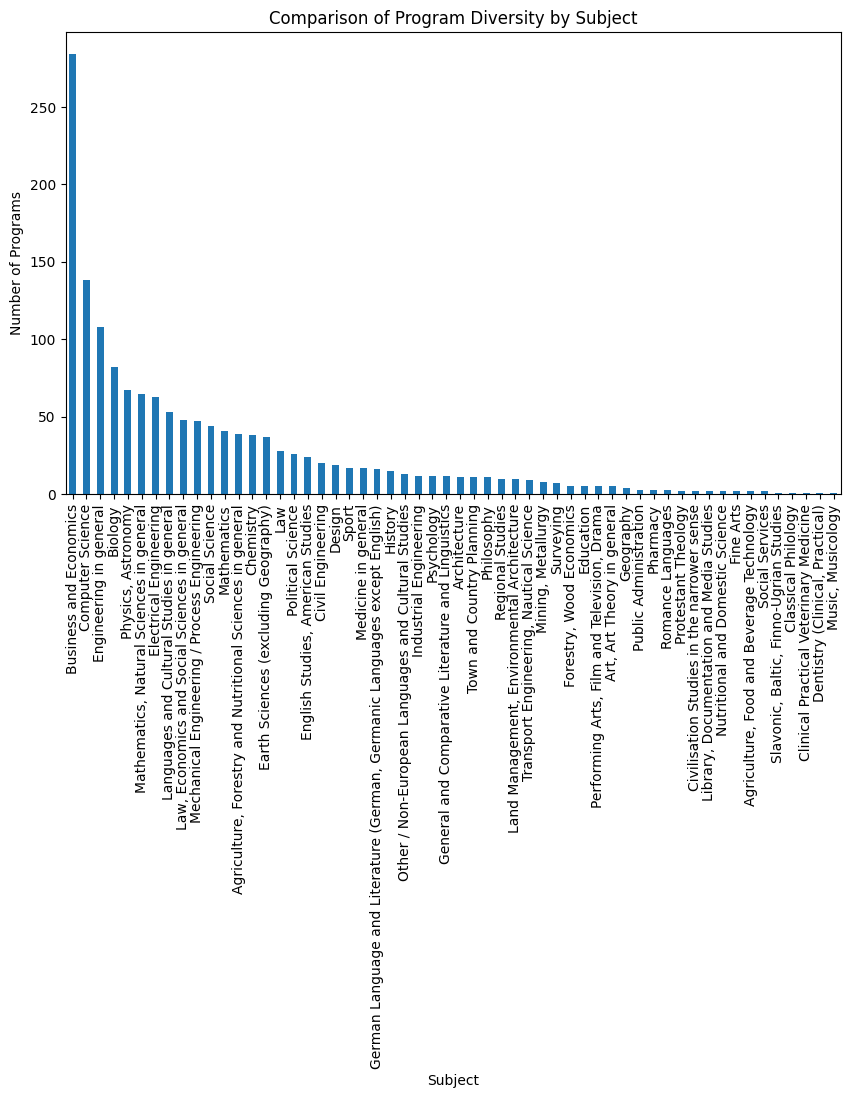

In [54]:
plt.figure(figsize=(10, 6))
subject_counts = df['Subject'].value_counts()
subject_counts.plot(kind='bar')
plt.title('Comparison of Program Diversity by Subject')
plt.xlabel('Subject')
plt.ylabel('Number of Programs')
plt.xticks(rotation=90)
plt.show()